In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import constants

**`scipy.constants` module has some physical constants**

In [31]:
for k,v in constants.physical_constants.items():
    print(k,v)

Wien displacement law constant (0.0028977685, 'm K', 5.1e-09)
atomic unit of 1st hyperpolarizablity (3.20636151e-53, 'C^3 m^3 J^-2', 2.8e-60)
atomic unit of 2nd hyperpolarizablity (6.2353808e-65, 'C^4 m^4 J^-3', 1.1e-71)
atomic unit of electric dipole moment (8.47835309e-30, 'C m', 7.3e-37)
atomic unit of electric polarizablity (1.648777274e-41, 'C^2 m^2 J^-1', 1.6e-49)
atomic unit of electric quadrupole moment (4.48655124e-40, 'C m^2', 3.9e-47)
atomic unit of magn. dipole moment (1.8548019e-23, 'J T^-1', 1.6e-30)
atomic unit of magn. flux density (235051.756758, 'T', 7.1e-05)
deuteron magn. moment (4.33073482e-27, 'J T^-1', 3.8e-34)
deuteron magn. moment to Bohr magneton ratio (0.0004669754567, '', 5e-12)
deuteron magn. moment to nuclear magneton ratio (0.8574382329, '', 9.2e-09)
deuteron-electron magn. moment ratio (-0.0004664345548, '', 5e-12)
deuteron-proton magn. moment ratio (0.3070122084, '', 4.5e-09)
deuteron-neutron magn. moment ratio (-0.44820652, '', 1.1e-07)
electron gyroma

In [32]:
# proton mass
constants.physical_constants['proton mass']

(1.67262192369e-27, 'kg', 5.1e-37)

**[丁老师的lesson0](https://www.youtube.com/watch?v=gPfvo2VNs54&list=PLo4wAAMJnA1wDQ2ZmTJCaBYdrXqBWUwT5&index=1)完全可以作为科学计算导论**

有一些操作我在我的[核电子学实验](https://github.com/Xuanyiyiren/Fundamental-Laboratory-Experiment-in-Nuclear-Electronics/tree/main/some%20useful%20code)中已经做过了，例如曲线拟合什么的就没写。

**`scipy.stats`**

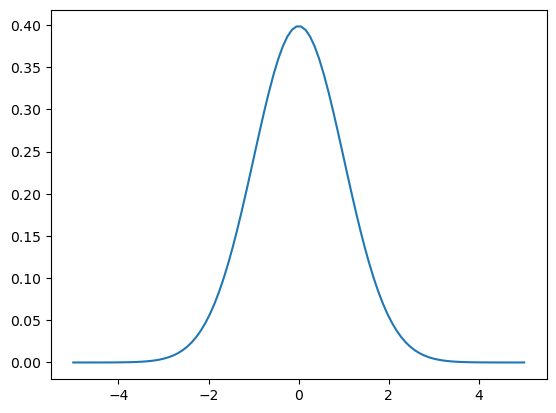

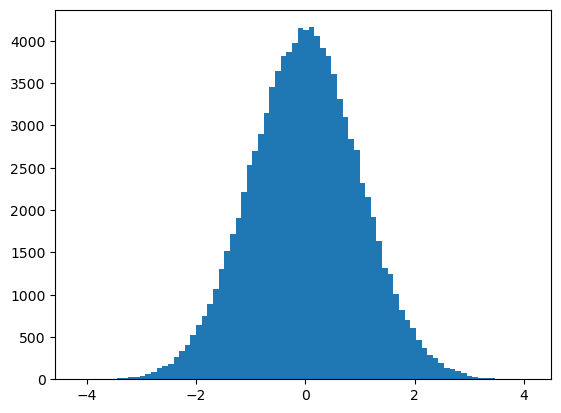

In [33]:
# make gaussian class
gaussian=sp.stats.norm
x=np.linspace(-5,5,100)
pdf=gaussian.pdf(x)
plt.plot(x,pdf)
plt.show()

# draw sample
sample = gaussian.rvs(size=100000)
plt.hist(sample, bins=80)
plt.show()

# 假设检验和p值
现在有一个样本，假设检验是指做出某种零假设 $H_0$ ，然后认为改假设成立，计算这种条件下这个样本出现的概率，这个概率就是p值。

In [34]:
# normality test

# make a normal distribution
sample_1=np.random.normal(0,1,1000)

print(sp.stats.normaltest(sample_1))

sample_2=np.random.uniform(0,10,1000)

print(sp.stats.normaltest(sample_2))


NormaltestResult(statistic=0.30508377096437894, pvalue=0.8585229335562478)
NormaltestResult(statistic=713.2449517818459, pvalue=1.3207681816909278e-155)


- 如果是正态分布的样本，在正态检验下的p值是 $0.68$ ，很高。
- 如果是均匀分布的样本，在正态检验下的p值是非常小的值 $1.4\times10^-167$ ，说明假设样本是正太分布，样本出现的概率非常小，所以假设不成立，样本不服从正态分布。

柯尔莫哥洛夫两样本检验，判断两个样本是否来自同一个分布

In [35]:
# ks 2 sample test
sample_1=np.random.normal(0,1,100)
sample_1=np.random.normal(0,1,100)
sp.stats.ks_2samp(sample_1,sample_2)

KstestResult(statistic=0.815, pvalue=2.3355825296711457e-64)

In [36]:
sample_1=np.random.normal(0,1,100)
sample_1=np.random.uniform(0,10,100)
sp.stats.ks_2samp(sample_1,sample_2)

KstestResult(statistic=0.045, pvalue=0.989783704290142)

# Special functions in scipy

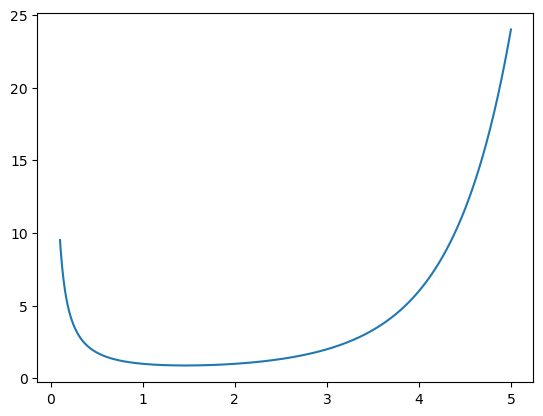

In [45]:
# special function
from scipy.special import gamma

x=np.linspace(0.1,5,1000)
f=gamma(x)
plt.plot(x,f)
plt.show()

# Astropy

In [60]:
import astropy as ap
import astropy.constants as const
import astropy.units as units
print(const.c)
print()
print(const.G)
const.G

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

astropy可以带单位运算

In [61]:
const.G*const.c

<Quantity 0.02000905 m4 / (kg s3)>

自定义单位

单位转换

In [66]:
a=5*units.kg
display(a.to(units.g))
display(a.to(units.Msun))

<Quantity 5000. g>

<Quantity 2.51457211e-30 solMass>

计算地球重力加速度

In [74]:
# calculate the gravitational acceleration
g = const.G * const.M_earth/(const.R_earth)**2
g

<Quantity 9.79839813 m / s2>

In [75]:
const.g0

<<class 'astropy.constants.codata2018.CODATA2018'> name='Standard acceleration of gravity' value=9.80665 uncertainty=0.0 unit='m / s2' reference='CODATA 2018'>

In [73]:
# 组合单位转换
display(g.to(units.km / units.s**2))

<Quantity 0.0097984 km / s2>

In [81]:
# time
from astropy.time import Time
t=Time.now()
t

<Time object: scale='utc' format='datetime' value=2024-01-20 16:09:07.946963>

<video width="640" height="360" controls>
  <source src="[your_video_url.mp4](https://www.bilibili.com/video/BV1CY4y1t7TZ?p=18&vd_source=e83f6243963f730d4d2994d23f588a9d)">
  Your browser does not support the video tag.
</video>